# Exploratory Data Analysis - Gestores

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from unidecode import unidecode

pd.set_option('display.max_columns', None)

In [2]:
PATH = '../data/raw/'

In [3]:
def replace_years_to_boolean(df, cols=['2014', '2015', '2016', '2017', '2018', '2019']):
    df.loc[:, cols] = df.loc[:, cols].replace({'NAO': False, 'SIM': True})

In [4]:
def drop_invalid_manager(df, cols=['2014', '2015', '2016', '2017', '2018']):
    df = df.loc[df[['2014', '2015', '2016', '2017', '2018']].any(axis=1)]
    df.reset_index(drop=True, inplace=True)
    return df

In [5]:
def qtt_manager_changes(df, attribute):
    result = None
    if type(attribute) == list:
        result = df.groupby(['CD_ESCOLA'])[attribute].sum().sum(axis=1)
    elif type(attribute) == str:
        result = df.groupby(['CD_ESCOLA'])[attribute].sum()
    return result    

## Diretores

In [6]:
df_diretores = pd.read_csv(os.path.join(PATH, 'DIRETORES DE ESCOLA.csv'), sep=';')
print(df_diretores.shape)
df_diretores.head()

(23352, 16)


,CD_ESCOLA,CD_SITUACAO,DIRETORIA,CD_UNIDADE,NOME_UNID_ADM,NM_PESSOA,NR_CPF,NR_DI,CD_CARGO,2014,2015,2016,2017,2018,2019,id_interno
0,902724,1,LESTE 3,67600,EE FERNANDO MAURO PIRES DA ROCHA - DEPUT...,288268,288268,1,6200,NAO,NAO,NAO,SIM,SIM,NAO,288268
1,924933,1,CAMPINAS OESTE,25358,EE GLORIA APARECIDA ROSA VIANA - PROFA. ...,347888,347888,1,6200,NAO,NAO,NAO,NAO,NAO,SIM,347888
2,13006,1,GUARATINGUETA,41785,EE LEONOR GUIMARAES - PROFA. ...,385732,385732,1,6200,NAO,SIM,SIM,SIM,SIM,NAO,385732
3,42250,1,PINDAMONHANGABA,57314,EE JOSE PINTO MARCONDES PESTANA - PROF. ...,385733,385733,1,6200,SIM,SIM,NAO,NAO,NAO,NAO,385733
4,10194,1,TABOAO DA SERRA,41399,EE ALIPIO DE OLIVEIRA E SILVA - PROF. ...,385734,385734,1,6200,SIM,SIM,NAO,NAO,NAO,NAO,385734


In [7]:
replace_years_to_boolean(df_diretores)

In [8]:
df_diretores.drop('2019', axis=1, inplace=True)

In [9]:
df_diretores = drop_invalid_manager(df_diretores)

### Diretores diferentes por escola

In [10]:
df_diretores['CD_ESCOLA'].value_counts()

34253     11
2800      11
13754     11
6713      11
915555    11
          ..
909488     1
909002     1
902032     1
1661       1
3244       1
Name: CD_ESCOLA, Length: 4988, dtype: int64

### Diretores diferentes por escola em 2018

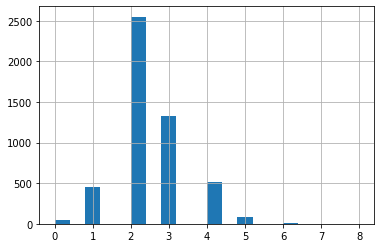

In [11]:
qtd_diretores_2018 = qtt_manager_changes(df_diretores, '2018')
qtd_diretores_2018.name = 'DIRETORES_QTD_2018'
qtd_diretores_2018.hist(bins=20)

### Troca de diretores por escola

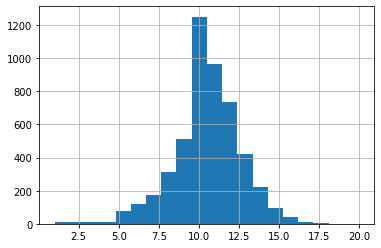

In [12]:
qtd_diretores_5_anos = qtt_manager_changes(df_diretores, ['2014', '2015', '2016', '2017', '2018'])
qtd_diretores_5_anos.name = 'DIRETORES_QTD_5_ANOS'
qtd_diretores_5_anos.hist(bins=20)

## Coordenadores

In [13]:
df_coordenador = pd.read_csv(os.path.join(PATH, 'PROFESSOR_COORDENADOR.csv'), sep=';')
print(df_coordenador.shape)
df_coordenador.head()

(24381, 17)


,CD_ESCOLA,CD_SITUACAO,DIRETORIA,CD_UNIDADE,NOME_UNID_ADM,NM_PESSOA,NR_CPF,NR_DI,CD_CARGO,2014,2015,2016,2017,2018,2019,id_interno,Unnamed: 16
0,40629,1,CARAPICUIBA,55204,EE MARIA MARQUES DE NORONHA - PROFA. ...,229814,229814,1,6409,NAO,NAO,SIM,NAO,NAO,NAO,229814,NaN
1,8990,1,SAO BERNARDO DO CAMPO,41173,EE ANTONIO CAPUTO ...,402152,402152,1,6409,SIM,SIM,NAO,NAO,NAO,NAO,402152,NaN
2,924945,1,CAMPINAS OESTE,25359,EE RESIDENCIAL SAO JOSE ...,286740,286740,1,6409,SIM,SIM,SIM,SIM,SIM,SIM,286740,NaN
3,921518,1,SUZANO,20051,EE JOSE CAMILO DE ANDRADE ...,402153,402153,1,6409,SIM,SIM,NAO,NAO,NAO,NAO,402153,NaN
4,921497,1,ITAQUAQUECETUBA,20049,EE DULCE MARIA SAMPAIO - PROFA. ...,298344,298344,1,6409,SIM,NAO,NAO,NAO,NAO,NAO,298344,NaN


In [14]:
df_coordenador.drop('Unnamed: 16', axis=1, inplace=True)

In [15]:
replace_years_to_boolean(df_coordenador)

In [16]:
df_coordenador.drop('2019', axis=1, inplace=True)

In [17]:
df_coordenador = drop_invalid_manager(df_coordenador)

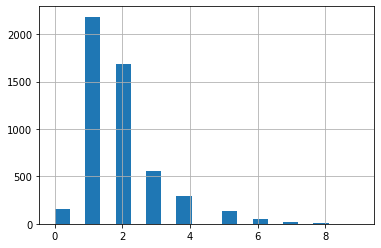

In [18]:
qtd_coordenadores_2018 = qtt_manager_changes(df_coordenador, '2018')
qtd_coordenadores_2018.name = 'COORDENADORES_QTD_2018'
qtd_coordenadores_2018.hist(bins=20)

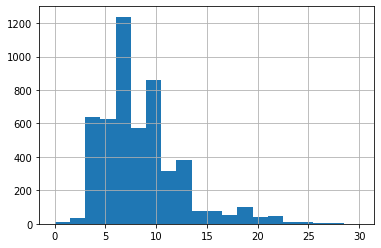

In [19]:
qtd_coordenadores_5_anos = qtt_manager_changes(df_coordenador, ['2014', '2015', '2016', '2017', '2018'])
qtd_coordenadores_5_anos.name = 'COORDENADORES_QTD_5_ANOS'
qtd_coordenadores_5_anos.hist(bins=20)

### Juntar caracteristicas do historico

In [20]:
features_historico = pd.concat([
    qtd_diretores_2018, qtd_coordenadores_2018, qtd_diretores_5_anos, qtd_coordenadores_5_anos
], axis=1)
features_historico.reset_index(inplace=True)
features_historico.head()

,CD_ESCOLA,DIRETORES_QTD_2018,COORDENADORES_QTD_2018,DIRETORES_QTD_5_ANOS,COORDENADORES_QTD_5_ANOS
0,12,1.0,5.0,5.0,17.0
1,24,3.0,3.0,11.0,17.0
2,36,4.0,3.0,13.0,13.0
3,48,2.0,2.0,8.0,10.0
4,59,4.0,1.0,12.0,6.0


### Preencher dados faltantes
A falta de informacao para os atributos criados (QTD_5_ANOS e QTD_2018) indica que nao houve mudanca de gestor. O valor utilizado para o preenchimento sera 1, representando um unico diretor.

In [21]:
features_historico.isnull().sum()

CD_ESCOLA                     0
DIRETORES_QTD_2018          124
COORDENADORES_QTD_2018        9
DIRETORES_QTD_5_ANOS        124
COORDENADORES_QTD_5_ANOS      9
dtype: int64

In [22]:
features_historico.fillna(1, inplace=True)

## Extrair caracteristicas dos diretores

### Leitura dos dados de servidores ativos

In [25]:
df_servidores = pd.read_csv(os.path.join(PATH, 'BASE_SERVIDORES_ATIVOS_1118.csv'), sep=';', encoding='latin-1', low_memory=False)
print(df_servidores.shape)
df_servidores.head()

(240465, 41)


,POLO_C,REGIAO_C,NOMEDE_C,UAC,NOMEUA_C,MUNICIPIO_C,NOME_SERVIDOR,RG,DI,CPF,RS,PV,SEXO,DATA_NASCIMENTO,IDADE,CARGO_C,NOMECAR_C,QUADRO_C,CATEG_C,DT_INICIO_EXERCICIO_C,ANOS_TRAB_CARGO_C,DISC_CONCURSO,DTI_INICIO_AFAS,POLO_E,REGIAO_E,NOMEDE_E,UA_E,LOCAL_UA,NOMEUA_E,MUNICIPIO_E,CARGO_E,NOMECAR_E,QUADRO_E,CATEG_E,DATA_INICIO_EXERCICIO_E,QTDE_ATS,EMAIL,JORNADA,TIPO_DEF,ID_COR,id_interno
0,POLO 10,INTERIOR,D.E.REG. ITU,41998,EE CESARIO MOTTA-DR.,ITU,247578.0,247578.0,1.0,247578.0,247578.0,7,M,16/01/1986,32.0,6409.0,PROFESSOR EDUCACAO BASICA II,QM,A,01/02/2013,5.0,2200.0,NaN,POLO 10,INTERIOR,D.E.REG. ITU,41998.0,UE,EE CESARIO MOTTA-DR.,ITU,6409.0,PROFESSOR EDUCACAO BASICA II,QM,A,01/02/2013,1.0,247578,B,NaN,P,247578.0
1,POLO 10,INTERIOR,D.E.REG. ITU,41998,EE CESARIO MOTTA-DR.,ITU,301407.0,301407.0,1.0,301407.0,301407.0,2,F,27/04/1971,47.0,6409.0,PROFESSOR EDUCACAO BASICA II,QM,F,12/02/2003,15.0,NaN,NaN,POLO 10,INTERIOR,D.E.REG. ITU,41998.0,UE,EE CESARIO MOTTA-DR.,ITU,6409.0,PROFESSOR EDUCACAO BASICA II,QM,F,12/02/2003,4.0,301407,,NaN,B,301407.0
2,POLO 04,GDE_SP,D.E.REG. GUARULHOS NORTE,40377,EE JUVENAL RAMOS BARBOSA,GUARULHOS,351824.0,351824.0,2.0,351824.0,351824.0,4,F,12/01/1965,53.0,6200.0,DIRETOR DE ESCOLA,QM,A,16/02/2009,9.0,0.0,NaN,POLO 01,CAPITAL,D.E.REG. NORTE 2,23850.0,DE,D.E.REG. NORTE 2,SAO PAULO,6444.0,SUPERVISOR DE ENSINO,QM,D,06/04/2016,3.0,351824,,NaN,B,351824.0
3,POLO 06,GDE_SP,D.E.REG. OSASCO,41366,EE BENEDICTO CALDEIRA-PROF.,OSASCO,152209.0,152209.0,2.0,152209.0,152209.0,3,F,24/04/1962,56.0,6200.0,DIRETOR DE ESCOLA,QM,A,10/01/2003,15.0,NaN,NaN,POLO 06,GDE_SP,D.E.REG. OSASCO,39632.0,DE,D.E.REG. OSASCO,OSASCO,6444.0,SUPERVISOR DE ENSINO,QM,D,06/09/2011,5.0,152209,,NaN,P,152209.0
4,POLO 06,GDE_SP,D.E.REG. ITAPEVI,22716,EE JOSEPHA PINTO CHIAVELLI-PFA,JANDIRA,235897.0,235897.0,1.0,235897.0,235897.0,4,F,13/03/1971,47.0,6409.0,PROFESSOR EDUCACAO BASICA II,QM,A,07/02/2000,18.0,1100.0,NaN,POLO 06,GDE_SP,D.E.REG. ITAPEVI,22716.0,UE,EE JOSEPHA PINTO CHIAVELLI-PFA,JANDIRA,6409.0,PROFESSOR EDUCACAO BASICA II,QM,A,07/02/2000,5.0,235897,R,NaN,B,235897.0


### Leitura da base formacao

In [26]:
df_formacao = pd.read_csv(os.path.join(PATH, 'BASE_FORMACAO_1118.csv'), sep=';', encoding='latin-1', decimal=',')

### Juntar bases para obter o codigo da escola

In [27]:
df_servidores = pd.merge(df_formacao[['CPF', 'UA_EXERC', 'DI', 'CIE_ESCOLA']], df_servidores, left_on=['CPF', 'UA_EXERC', 'DI'], right_on=['CPF', 'UA_E', 'DI'], how='inner')

### Cacular o tempo cargo de exercicio

In [28]:
df_servidores['DATA_INICIO_EXERCICIO_E'] = pd.to_datetime(df_servidores['DATA_INICIO_EXERCICIO_E'], format='%d/%m/%Y')

In [29]:
df_servidores['ANOS_TRAB_CARGO_E'] = (pd.to_datetime('31-12-2018') - df_servidores['DATA_INICIO_EXERCICIO_E']).astype('timedelta64[Y]')

### Verificar servidores com cargo de exercicio diferente do cargo de classificacao

In [30]:
df_servidores['CARGO_CLAS_EXER_IGUAIS'] = (df_servidores['CARGO_C'] == df_servidores['CARGO_E']).astype(int)

### Filtrar apenas os cargos de diretor
Uma quantidade pequena de escolas apresentam mais de um diretor. A abordagem a seguir seleciona apenas um diretor, priorizando o mais antigo

In [31]:
df_servidores_diretores = df_servidores[df_servidores['CARGO_E'] == 6200]
df_servidores_diretores = df_servidores_diretores.sort_values('ANOS_TRAB_CARGO_E', ascending=False).drop_duplicates(subset=['CIE_ESCOLA'], keep='first')

### Selecao dos atributos

In [32]:
df_servidores_diretores = df_servidores_diretores[['CPF', 'CIE_ESCOLA', 'CARGO_E', 'NOMECAR_E',  'IDADE', 'CARGO_CLAS_EXER_IGUAIS', 'ANOS_TRAB_CARGO_C', 'ANOS_TRAB_CARGO_E']]

In [33]:
df_servidores_diretores[['CPF', 'CIE_ESCOLA', 'CARGO_E', 'NOMECAR_E',  'IDADE', 'CARGO_CLAS_EXER_IGUAIS', 'ANOS_TRAB_CARGO_C', 'ANOS_TRAB_CARGO_E']].head()

,CPF,CIE_ESCOLA,CARGO_E,NOMECAR_E,IDADE,CARGO_CLAS_EXER_IGUAIS,ANOS_TRAB_CARGO_C,ANOS_TRAB_CARGO_E
211898,340894.0,5812,6200.0,DIRETOR DE ESCOLA,67.0,1,46.0,46.0
219377,353708.0,923849,6200.0,DIRETOR DE ESCOLA,68.0,1,41.0,41.0
12977,342406.0,39858,6200.0,DIRETOR DE ESCOLA,70.0,1,41.0,41.0
224473,234012.0,28319,6200.0,DIRETOR DE ESCOLA,70.0,1,39.0,39.0
79020,346705.0,10510,6200.0,DIRETOR DE ESCOLA,65.0,1,39.0,39.0


In [34]:
df_servidores_diretores.columns = 'DIRETOR_' + df_servidores_diretores.columns 

## Juntar caracteristicas da diretoria com as caractericas relacionadas ao historico

In [35]:
features = pd.merge(features_historico, df_servidores_diretores, left_on='CD_ESCOLA', right_on='DIRETOR_CIE_ESCOLA', how='inner')

## Exportar dados

In [36]:
features.head()

,CD_ESCOLA,DIRETORES_QTD_2018,COORDENADORES_QTD_2018,DIRETORES_QTD_5_ANOS,COORDENADORES_QTD_5_ANOS,DIRETOR_CPF,DIRETOR_CIE_ESCOLA,DIRETOR_CARGO_E,DIRETOR_NOMECAR_E,DIRETOR_IDADE,DIRETOR_CARGO_CLAS_EXER_IGUAIS,DIRETOR_ANOS_TRAB_CARGO_C,DIRETOR_ANOS_TRAB_CARGO_E
0,24,3.0,3.0,11.0,17.0,140419.0,24,6200.0,DIRETOR DE ESCOLA,33.0,1,0.0,0.0
1,36,4.0,3.0,13.0,13.0,361644.0,36,6200.0,DIRETOR DE ESCOLA,50.0,0,18.0,0.0
2,48,2.0,2.0,8.0,10.0,334774.0,48,6200.0,DIRETOR DE ESCOLA,58.0,0,18.0,2.0
3,59,4.0,1.0,12.0,6.0,149926.0,59,6200.0,DIRETOR DE ESCOLA,38.0,0,10.0,0.0
4,61,2.0,2.0,10.0,8.0,342266.0,61,6200.0,DIRETOR DE ESCOLA,53.0,1,9.0,9.0


In [38]:
features.to_csv('../data/processed/gestores_historico.csv', index=False)